# import libbraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

import tensorflow as tf
import tensorflow_hub as hub


**load the dataset**

In [2]:
df = pd.read_csv("/content/wine-reviews.csv")

In [3]:
df.head(5)

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129971 entries, 0 to 129970
Data columns (total 14 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Unnamed: 0             129971 non-null  int64  
 1   country                129908 non-null  object 
 2   description            129971 non-null  object 
 3   designation            92506 non-null   object 
 4   points                 129971 non-null  int64  
 5   price                  120975 non-null  float64
 6   province               129908 non-null  object 
 7   region_1               108724 non-null  object 
 8   region_2               50511 non-null   object 
 9   taster_name            103727 non-null  object 
 10  taster_twitter_handle  98758 non-null   object 
 11  title                  129971 non-null  object 
 12  variety                129970 non-null  object 
 13  winery                 129971 non-null  object 
dtypes: float64(1), int64(2), object(11)


In [5]:
df.shape

(129971, 14)

In [6]:
df.isnull().sum()

Unnamed: 0                   0
country                     63
description                  0
designation              37465
points                       0
price                     8996
province                    63
region_1                 21247
region_2                 79460
taster_name              26244
taster_twitter_handle    31213
title                        0
variety                      1
winery                       0
dtype: int64

In [7]:
# Missingno is an Python library that provides a series of visualisations to 
# understand the presence and distribution of missing data within a pandas dataframe.
import missingno as msno

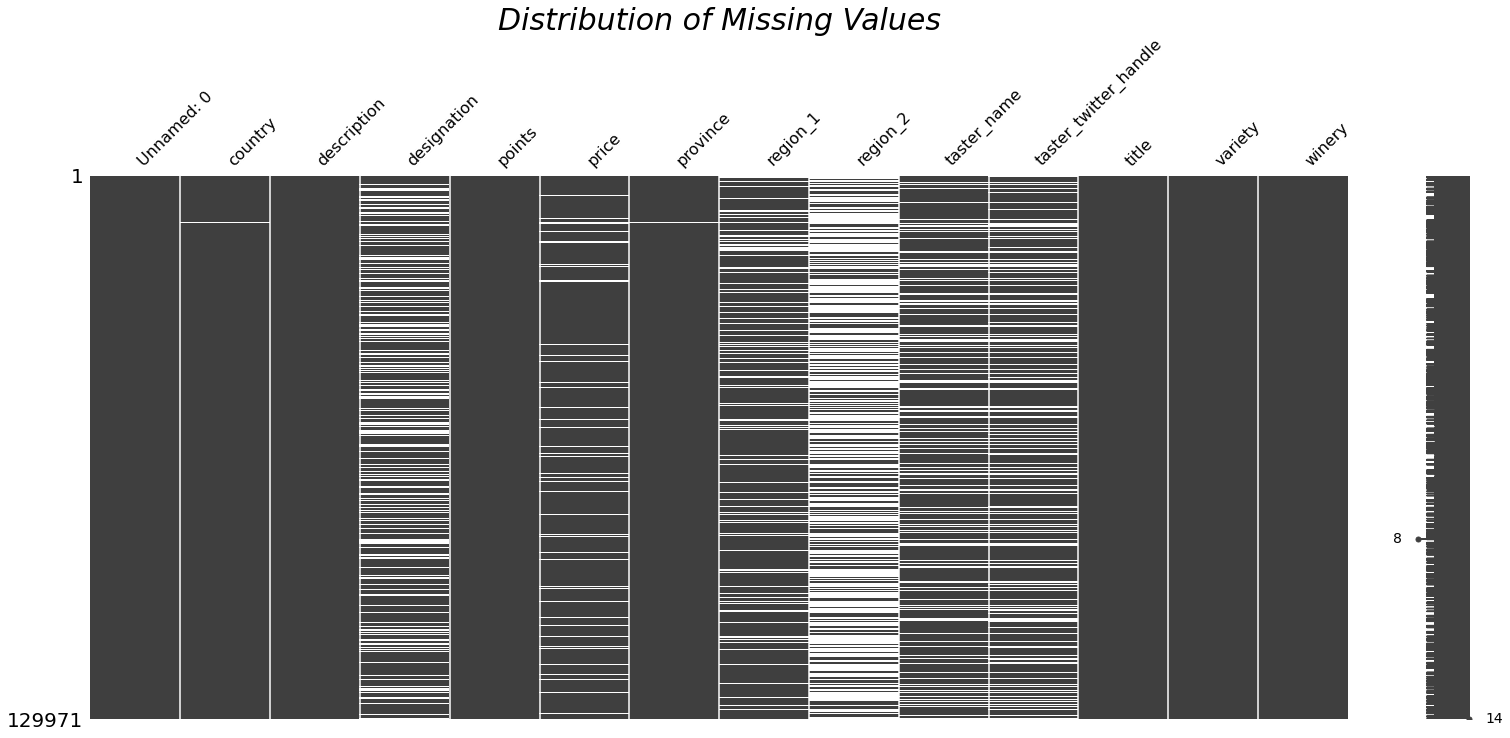

In [8]:
msno.matrix(df)
plt.title('Distribution of Missing Values', fontsize=30, fontstyle='oblique');

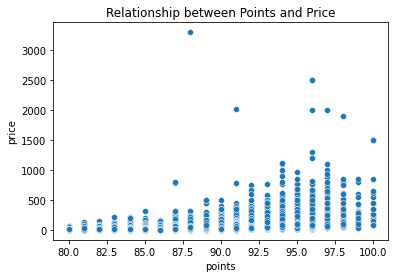

In [9]:
sns.scatterplot(x='points', y='price', data=df)
plt.title('Relationship between Points and Price')
plt.show()


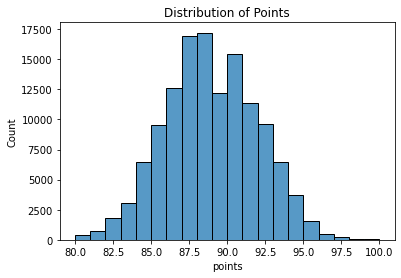

In [10]:
sns.histplot(data=df, x='points', bins=20)
plt.title('Distribution of Points')
plt.show()

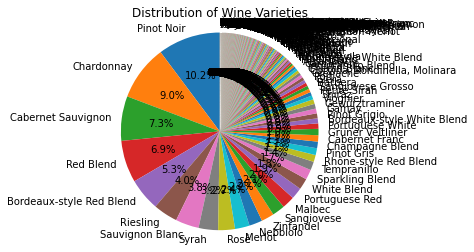

In [11]:
counts = df['variety'].value_counts()
labels = counts.index.tolist()
sizes = counts.values.tolist()

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
ax1.axis('equal')
plt.title('Distribution of Wine Varieties')
plt.show()

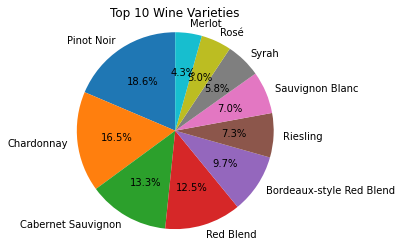

In [12]:
# top 10 Varieties
counts = df['variety'].value_counts().nlargest(10)
labels = counts.index.tolist()
sizes = counts.values.tolist()

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
ax1.axis('equal')
plt.title('Top 10 Wine Varieties')
plt.show()


In [13]:
import plotly.express as px

In [14]:
country_counts = df['country'].value_counts().reset_index()
country_counts.columns = ['Country', 'Count']
country_counts = country_counts[country_counts['Country'] != 'Unknown']
fig = px.choropleth(country_counts, locations='Country', locationmode='country names', color='Count', 
                    title='Distribution of Wine-Producing Countries')
fig.show()

In [15]:
# it is a method to take important column from the dataset
# df = pd.read_csv("/content/wine-reviews.csv", usecols = ['country','description','points','price','variety','winery'])

**drop some columns**

In [16]:
cols = df.columns.tolist()
print(cols)

['Unnamed: 0', 'country', 'description', 'designation', 'points', 'price', 'province', 'region_1', 'region_2', 'taster_name', 'taster_twitter_handle', 'title', 'variety', 'winery']


In [17]:
df = df.drop(['Unnamed: 0','designation','province','region_1','region_2','taster_name','taster_twitter_handle','title'], axis = 1)

In [18]:
df.sample(5)

,country,description,points,price,variety,winery
120149,US,A sharp brine character gets warmer boosts fro...,91,24.0,Chardonnay,Talley
32659,US,"The blend includes 6% Syrah, and the wine has ...",87,8.0,Merlot,Columbia Crest
101903,US,"Seductive aromas of raspberries, sandalwood, g...",89,35.0,Pinot Noir,MacMurray Estate Vineyards
107955,Italy,"A densely concentrated but unbalanced wine, it...",86,120.0,Sangiovese,Casa Raia
114143,France,"This light, crisp and fruity wine dances in th...",85,15.0,Rosé,Union de Vignerons de l'Île de Beauté


**handle the missing values**

In [19]:
df.isnull().sum()

country          63
description       0
points            0
price          8996
variety           1
winery            0
dtype: int64

In [20]:
df = df.dropna(subset = ['country','variety','price'])

In [21]:
df.head(5)

,country,description,points,price,variety,winery
1,Portugal,"This is ripe and fruity, a wine that is smooth...",87,15.0,Portuguese Red,Quinta dos Avidagos
2,US,"Tart and snappy, the flavors of lime flesh and...",87,14.0,Pinot Gris,Rainstorm
3,US,"Pineapple rind, lemon pith and orange blossom ...",87,13.0,Riesling,St. Julian
4,US,"Much like the regular bottling from 2012, this...",87,65.0,Pinot Noir,Sweet Cheeks
5,Spain,Blackberry and raspberry aromas show a typical...,87,15.0,Tempranillo-Merlot,Tandem


In [22]:
df.isnull().sum()

country        0
description    0
points         0
price          0
variety        0
winery         0
dtype: int64

In [23]:
df.shape

(120915, 6)

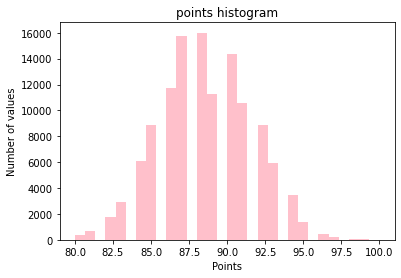

In [24]:
plt.hist(df.points, bins = 30, color = 'pink')
plt.title('points histogram')
plt.ylabel("Number of values")
plt.xlabel("Points")
plt.show()

In [25]:
# we check each value in the "points" column is greater than or equal to 90.
df["label"] = (df.points >= 90).astype(int)
df = df[["description","label"]]

In [26]:
df.head(5)

,description,label
1,"This is ripe and fruity, a wine that is smooth...",0
2,"Tart and snappy, the flavors of lime flesh and...",0
3,"Pineapple rind, lemon pith and orange blossom ...",0
4,"Much like the regular bottling from 2012, this...",0
5,Blackberry and raspberry aromas show a typical...,0


In [27]:
# df.sample: This line randomly shuffles the rows in the DataFrame
# frac = 1 : which means to include all rows in the shuffled DataFrame
# training contain 80% , validation 10, test 10 
# int(0.8*len(df)) and int(0.9*len(df)) are used to convert the percentages into intege

train , val, test = np.split(df.sample(frac = 1), [int(0.8*len(df)), int(0.9*len(df))] )

In [28]:
len(train), len(val), len(test)

(96732, 12091, 12092)

In [29]:
def df_to_dataset(dataframe, shuffle=True, batch_size=1024):

# it will craete a copy of dataframe
  df = dataframe.copy()

# is used to extract the values in a column named 
  labels = df.pop('label')


  df = df["description"]

  
  ds = tf.data.Dataset.from_tensor_slices((df, labels))
  if shuffle:
    ds = ds.shuffle(buffer_size=len(dataframe))
  ds = ds.batch(batch_size)
  ds = ds.prefetch(tf.data.AUTOTUNE)
  return ds

In [30]:
train_data = df_to_dataset(train)
valid_data = df_to_dataset(val)
test_data = df_to_dataset(test)

In [31]:
list (train_data)[0]

(<tf.Tensor: shape=(1024,), dtype=string, numpy=
 array([b'A fragrant and fruity wine, ripe in character, its black currant fruits showing strongly. The wine is richly textured, opulent and full in the mouth. It has weight, spice, jammy black fruit and sweet tannins.',
        b"While rich and almost nectar like in ripeness, this vibrantly peachy, floral wine is kept in check by an exhilarating strike of lime acidity. Off dry in style, it's concentrated and penetrating, yet bracingly sheer. It would be a showstopper ap\xc3\xa9ritif at the most elegant cocktail party.",
        b"This is a delicious Chardonay. It dances in pear, peach and lemon notes. Balanced and addictive, it's easy to love and not overly complicated at all. Encased in just enough oak to provide texture and weight, this is a great wine for parties or casual dinners, pairable with just about anything.",
        ...,
        b'A vivid gold color and spice-rack aromas like nutmeg and cardamom add a different twist to thi

# Embedding Model

In [32]:
# TensorFlow to load a pre-trained word embedding model from TensorFlow Hub.
# tfhub.dev: This is the URL for TensorFlow Hub.
# embedding: This variable is assigned the result.

embedding = "https://tfhub.dev/google/nnlm-en-dim50/2"

In [33]:
hub_layer = hub.KerasLayer(embedding, dtype=tf.string, trainable=True)

In [34]:
# is likely used to apply a pre-trained word embedding layer to text data in the form of a Pandas DataFrame. 

hub_layer(list(train_data)[0][0])

<tf.Tensor: shape=(1024, 50), dtype=float32, numpy=
array([[ 0.46886405, -0.32371324, -0.08898935, ...,  0.10525332,
         0.01554964,  0.20499475],
       [ 0.5186239 , -0.41827783, -0.03282323, ..., -0.14059961,
        -0.04395371, -0.00581571],
       [ 0.23640393, -0.35316825,  0.09213628, ...,  0.01615727,
         0.19862427,  0.28830922],
       ...,
       [ 0.5154262 , -0.17440547,  0.15363835, ...,  0.20526369,
        -0.13462804, -0.07519997],
       [ 0.47918352, -0.4150289 , -0.00167999, ..., -0.07807948,
        -0.2189876 ,  0.06626773],
       [ 0.13418771, -0.00961648, -0.03560679, ..., -0.08932322,
        -0.21923491, -0.13408443]], dtype=float32)>

In [35]:
model = tf.keras.Sequential()  # add layers to the model one by one.

model.add(hub_layer) #  adds the pre-trained word embedding layer to the model as the first layer.

model.add(tf.keras.layers.Dense(16, activation='relu')) #  adds a dense layer with 16 units

model.add(tf.keras.layers.Dropout(0.4)) #  adds a dropout layer with a rate of 0.4

model.add(tf.keras.layers.Dense(16, activation='relu'))

model.add(tf.keras.layers.Dropout(0.4))

model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

In [36]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=['accuracy'])

In [37]:
model.evaluate(train_data)

Instructions for updating:
Lambda fuctions will be no more assumed to be used in the statement where they are used, or at least in the same block. https://github.com/tensorflow/tensorflow/issues/56089


95/95 [==============================] - 4s 25ms/step - loss: 0.6831 - accuracy: 0.6017


[0.683054506778717, 0.601714015007019]

In [38]:
model.evaluate(valid_data)

12/12 [==============================] - 0s 15ms/step - loss: 0.6827 - accuracy: 0.6019


[0.682717502117157, 0.6018525958061218]

In [39]:
history = model.fit(train_data, epochs=5, validation_data=valid_data)

Epoch 1/5
95/95 [==============================] - 66s 671ms/step - loss: 0.6265 - accuracy: 0.6286 - val_loss: 0.5220 - val_accuracy: 0.7662
Epoch 2/5
95/95 [==============================] - 59s 619ms/step - loss: 0.4822 - accuracy: 0.7643 - val_loss: 0.4154 - val_accuracy: 0.8166
Epoch 3/5
95/95 [==============================] - 57s 604ms/step - loss: 0.4112 - accuracy: 0.8255 - val_loss: 0.3911 - val_accuracy: 0.8238
Epoch 4/5
95/95 [==============================] - 58s 609ms/step - loss: 0.3733 - accuracy: 0.8464 - val_loss: 0.3831 - val_accuracy: 0.8254
Epoch 5/5
95/95 [==============================] - 58s 605ms/step - loss: 0.3474 - accuracy: 0.8581 - val_loss: 0.3832 - val_accuracy: 0.8276


In [40]:
# my model is overfitted

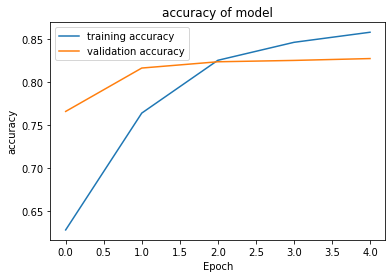

In [41]:
# check the accuracy of my model

plt.plot(history.history["accuracy"], label = "training accuracy")
plt.plot(history.history["val_accuracy"], label = "validation accuracy")
plt.title("accuracy of model")
plt.ylabel("accuracy")
plt.xlabel("Epoch")
plt.legend()
plt.show()


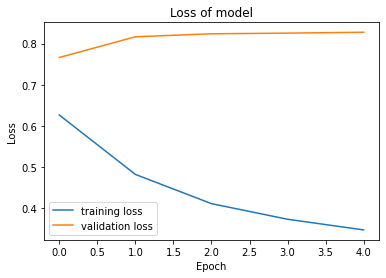

In [42]:
# for loos

plt.plot(history.history["loss"], label = "training loss")
plt.plot(history.history["val_accuracy"], label = "validation loss")
plt.title("Loss of model")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.legend()
plt.show()

In [43]:
model.evaluate(test_data)

12/12 [==============================] - 1s 105ms/step - loss: 0.3905 - accuracy: 0.8223


[0.390536367893219, 0.8222792148590088]

# apply  Long Short-Term Memory

In [44]:
# Long Short-Term Memory and it is a type of recurrent neural network (RNN)
# that is commonly used in deep learning for sequential data processing
# tasks such as natural language processing (NLP) and speech recognition

In [45]:
encoder = tf.keras.layers.TextVectorization(max_tokens=2000)
encoder.adapt(train_data.map(lambda text, label: text))

In [46]:
vocab = np.array(encoder.get_vocabulary())
vocab[:20]

array(['', '[UNK]', 'and', 'the', 'a', 'of', 'with', 'this', 'is', 'wine',
       'flavors', 'in', 'to', 'it', 'its', 'on', 'fruit', 'aromas',
       'palate', 'finish'], dtype='<U17')

In [47]:
model = tf.keras.Sequential([
    encoder,
    tf.keras.layers.Embedding(
        input_dim=len(encoder.get_vocabulary()),
        output_dim=32,
        mask_zero=True
    ),
    tf.keras.layers.LSTM(32),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [48]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=['accuracy'])

In [49]:
model.evaluate(train_data)
model.evaluate(valid_data)

12/12 [==============================] - 2s 147ms/step - loss: 0.6934 - accuracy: 0.4605


[0.6933900713920593, 0.4605078101158142]

In [50]:
history = model.fit(train_data, epochs=5, validation_data=valid_data)

Epoch 1/5
95/95 [==============================] - 30s 285ms/step - loss: 0.5628 - accuracy: 0.7001 - val_loss: 0.3858 - val_accuracy: 0.8208
Epoch 2/5
95/95 [==============================] - 26s 275ms/step - loss: 0.3757 - accuracy: 0.8338 - val_loss: 0.3568 - val_accuracy: 0.8352
Epoch 3/5
95/95 [==============================] - 26s 276ms/step - loss: 0.3478 - accuracy: 0.8479 - val_loss: 0.3518 - val_accuracy: 0.8409
Epoch 4/5
95/95 [==============================] - 26s 275ms/step - loss: 0.3378 - accuracy: 0.8515 - val_loss: 0.3495 - val_accuracy: 0.8393
Epoch 5/5
95/95 [==============================] - 26s 276ms/step - loss: 0.3323 - accuracy: 0.8549 - val_loss: 0.3478 - val_accuracy: 0.8424
